## This code was used for the data analysis for hypothesis 4

Author: Ruward Karper <br/>
Date: June 2020 

All code should be executed in the order of this file. Too fast consecutive execution of the code blocks may result in errors. Since I am under a NDA for the use of the data for my research, this code is only to show what I have done. I can unfortunately not share the data that I used without explicit consent of the data subjects.

In [1]:
# import required libraries 
import pandas as pd
import numpy as np
import os
import docx2txt
import matplotlib.pyplot as plt
import nltk 
import nltk.corpus
from nltk.tokenize import word_tokenize
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats
import seaborn as sns

In [2]:
# change working directory to the directory that contains the transcripts. This code requires the transcripts in order to run. 
os.chdir(r"D:\Transcripts\Text")  # change according to location of transcripts on your device 
print("Directory changed successfully to " + str(os.getcwd()))

Directory changed successfully to D:\Transcripts\Text


In [3]:
# define personal words
personal = ['you', 'your', 'you\'re','yours','yourself','yourselves']

In [4]:
# print the names of the transcript files, for easy reference 
for filename in os.listdir():  # loop over the files in current working directory
    print(filename)

01_Transcript_tAIste.docx
10_Transcript_YoungBoosters.docx
11_Transcript_Whitebox.docx
12_Transcript_SoccerAcademy.docx
13_Transcript_Ar-T-ficial.docx
14_Transcript_Recipe-Me.docx
15_Transcript_Salix.docx
16_Transcript_Peech.docx
17_Transcript_HoodFood.docx
18_Transcript_LockUp.docx
2_Transcript_Choos3Wisely.docx
3_Transcript_smArt.docx
4_Transcript_StudentFood.docx
5_Transcript_wAIste.docx
6_Transcript_Chattern.docx
7_Transcript_FindIT.docx
8_Transcript_Ziggurat.docx
9_Transcript_PREA.docx


In [5]:
count_list = []  # empty list, this list will contain the total amount of personal words counted for each pitch

for file in os.listdir():  # loop over each pitch
    text = docx2txt.process(file)  # process the text in the transcripts to python
    text = text.lower()  # remove capital letters
    token = word_tokenize(text)  # apply the tokenizer, turning every word or punctuation mark into a token
    count = 0
    for word in token:  # loop over all the tokens
        if word in personal:  # word is a personal word
            count += 1
    count_list.append(count)  # add the total amount of personal words counted for this pitch to the list 

In [6]:
count_list

[6, 7, 18, 19, 14, 16, 26, 5, 12, 12, 10, 15, 8, 12, 8, 13, 2, 13]

In [7]:
df = pd.read_excel(r'D:\Transcripts\BEP_survey_data.xlsx')  # load survey data into pandas dataframe
df_small = df.drop(df.columns[[3,4,5,6,7,8,9,10,14]], axis=1)  # only keep the waveid, pitchid, startup, and factor 2 variables
df_xsmall = df_small.drop(df_small.index[0])  # remove row with column titles
df_xsmall.dropna(inplace=True)  # remove rows with NaN values
transcribed = [2,3,4]  # wave 2, 3, and 4
df_final = df_xsmall[df_xsmall.wave != 1.0]  # remove data from wave 1, as transcripts were not ready
df_final

,wave,pitchid,pitch,coach6,coach7,coach8
1,3,1.0,tAIste,4,3,2
2,3,1.0,tAIste,3,2,2
3,3,1.0,tAIste,2,3,2
4,3,2.0,Choos3 Wisely,4,3,2
5,3,2.0,Choos3 Wisely,2,2,1
6,3,2.0,Choos3 Wisely,3,3,2
7,3,3.0,SmArt,4,4,3
8,3,3.0,SmArt,4,3,3
9,3,3.0,SmArt,3,3,3
10,3,4.0,StudentFood,4,4,2


In [8]:
df_final = df_final.drop(df_final.columns[[0,2]], axis=1)  # drop the waveid and startup
df_final

,pitchid,coach6,coach7,coach8
1,1.0,4,3,2
2,1.0,3,2,2
3,1.0,2,3,2
4,2.0,4,3,2
5,2.0,2,2,1
6,2.0,3,3,2
7,3.0,4,4,3
8,3.0,4,3,3
9,3.0,3,3,3
10,4.0,4,4,2


In [9]:
# turn the pitchid into a string, turn all other values into integers
df_final = df_final.astype({"pitchid": str, "coach6": int, "coach7": int, "coach8": int})

In [10]:
df_final['mean commitment'] = df_final.mean(axis=1)  # calculate the mean for each pitch per investor and add it to the dataframe
df_final

,pitchid,coach6,coach7,coach8,mean commitment
1,1.0,4,3,2,3.000000
2,1.0,3,2,2,2.333333
3,1.0,2,3,2,2.333333
4,2.0,4,3,2,3.000000
5,2.0,2,2,1,1.666667
6,2.0,3,3,2,2.666667
7,3.0,4,4,3,3.666667
8,3.0,4,3,3,3.333333
9,3.0,3,3,3,3.000000
10,4.0,4,4,2,3.333333


In [11]:
# take the mean per pitch of the means calculated per investor
means_per_pitch = df_final.groupby('pitchid')['mean commitment'].mean()

In [12]:
print(means_per_pitch)

pitchid
1.0     2.555556
10.0    3.222222
11.0    3.777778
12.0    3.555556
13.0    3.777778
14.0    3.222222
15.0    2.444444
16.0    4.111111
17.0    3.333333
18.0    2.333333
19.0    2.888889
2.0     2.444444
3.0     3.333333
4.0     3.444444
5.0     3.222222
7.0     3.777778
8.0     3.333333
9.0     3.166667
Name: mean commitment, dtype: float64


In [13]:
means = means_per_pitch.tolist()  # convert composite commitment scores to list

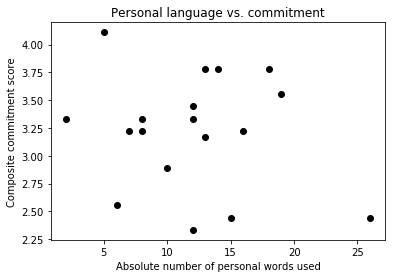

In [14]:
# plot scatterplot to visualize the data
plt.title('Personal language vs. commitment')
plt.xlabel('Absolute number of personal words used')
plt.ylabel('Composite commitment score')
plt.plot(count_list, means, 'o', color='black')
#plt.savefig('H4.png')

In [15]:
# print mean and variance of composite commitment and total amount of counted personal words
print(np.mean(means), np.std(means))
print(np.mean(count_list), np.std(count_list))

3.2191358024691357 0.4984448456314544
12.0 5.5677643628300215


In [16]:
# calculate the covariance
covariance = np.cov(means, count_list)
print(covariance)

[[ 0.26306181 -0.53267974]
 [-0.53267974 32.82352941]]


C:\Users\Ruward\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ruward\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of composite commitment')

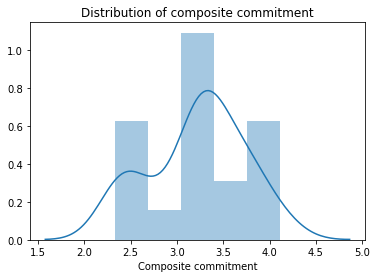

In [17]:
# plot composite commitment distribution
sns.distplot(means)
plt.xlabel('Composite commitment')
plt.title('Distribution of composite commitment')
#plt.savefig('DistrubtionCommitment')

C:\Users\Ruward\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ruward\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of amount of personal words used')

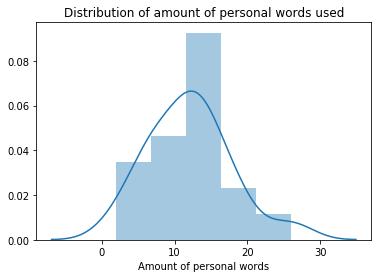

In [18]:
# plot total amount of personal words used distribution
sns.distplot(count_list)
plt.xlabel('Amount of personal words')
plt.title('Distribution of amount of personal words used')
#plt.savefig('DistributionPersonal')

In [19]:
# calculate the Pearson correlation coefficient
corr, _ = pearsonr(count_list, means)
print('Pearson correlation: %.3f' % corr)

Pearson correlation: -0.181


In [20]:
# calculate the Spearman correlation coefficient
corr, _ = spearmanr(count_list, means)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.022
